### Technical Indicators

A lot of investors follow technical indicators. I'm gonna include the most popular ones as independent features. I'll be using this excellent [library](https://technical-analysis-library-in-python.readthedocs.io/en/latest/) for Technical Analysis to financial time series datasets (open, close, high, low, volume), for feature engineering.

In [1]:
import ta
import pandas as pd
from utils import get_apple_stock, plot_columns, load_csv_with_dates, plot_series, plot_field_over_time

In [2]:
def add_technical_indicators(df):
    copy = df.copy()
    
    # Momentum Indicators 
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#momentum-indicators
    copy['ao'] = ta.momentum.ao(copy['High'], copy['Low'], s=5, len=34, fillna=False)
    copy['mfi_14'] = ta.momentum.money_flow_index(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=14, fillna=False)
    copy['rsi_14'] = ta.momentum.rsi(copy['Close'], n=14, fillna=False)
    copy['so_14'] = ta.momentum.stoch(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['so_sig_14'] = ta.momentum.stoch_signal(copy['High'], copy['Low'], copy['Close'], n=14, d_n=3, fillna=False)
    copy['tsi'] = ta.momentum.tsi(copy['Close'], r=25, s=13, fillna=False)
    copy['uo'] = ta.momentum.uo(copy['High'], copy['Low'], copy['Close'], s=7, m=14, len=28, ws=4.0, wm=2.0, wl=1.0, fillna=False)
    copy['wr'] = ta.momentum.wr(copy['High'], copy['Low'], copy['Close'], lbp=14, fillna=False)
    
    # Volume Indicators
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#volume-indicators
    copy['adi'] = ta.volume.acc_dist_index(copy['High'], copy['Low'], copy['Close'], copy['Volume'], fillna=False)
    copy['cmf'] = ta.volume.chaikin_money_flow(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=20, fillna=False)
    copy['eom_20'] = ta.volume.ease_of_movement(copy['High'], copy['Low'], copy['Close'], copy['Volume'], n=20, fillna=False)
    copy['fi2'] = ta.volume.force_index(copy['Close'], copy['Volume'], n=2, fillna=False)
    copy['nvi'] = ta.volume.negative_volume_index(copy['Close'], copy['Volume'], fillna=False)
    copy['obv'] = ta.volume.on_balance_volume(copy['Close'], copy['Volume'], fillna=False)
    copy['vpt'] = ta.volume.volume_price_trend(copy['Close'], copy['Volume'], fillna=False)
    
    # Volatility Indicators
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#volatility-indicators
    copy['atr_14'] = ta.volatility.average_true_range(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['b_hband_20'] = ta.volatility.bollinger_hband(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_hband_ind_20'] = ta.volatility.bollinger_hband_indicator(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_lband_20'] = ta.volatility.bollinger_lband(copy['Close'], n=20, ndev=2, fillna=False)
    copy['b_lband_ind_20'] = ta.volatility.bollinger_lband_indicator(copy['Close'], n=20, ndev=2, fillna=False)
    copy['mavg_10'] = ta.volatility.bollinger_mavg(copy['Close'], n=10, fillna=False)
    copy['mavg_20'] = ta.volatility.bollinger_mavg(copy['Close'], n=20, fillna=False)
    copy['mavg_50'] = ta.volatility.bollinger_mavg(copy['Close'], n=50, fillna=False)
    copy['mavg_200'] = ta.volatility.bollinger_mavg(copy['Close'], n=200, fillna=False)
    copy['dc_hband_20'] = ta.volatility.donchian_channel_hband(copy['Close'], n=20, fillna=False)
    copy['dc_hband_ind_20'] = ta.volatility.donchian_channel_hband_indicator(copy['Close'], n=20, fillna=False)
    copy['dc_lband_20'] = ta.volatility.donchian_channel_lband(copy['Close'], n=20, fillna=False)
    copy['dc_lband_ind_20'] = ta.volatility.donchian_channel_lband_indicator(copy['Close'], n=20, fillna=False)
    copy['kc10'] = ta.volatility.keltner_channel_central(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_hband_10'] = ta.volatility.keltner_channel_hband(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_hband_ind_10'] = ta.volatility.keltner_channel_hband_indicator(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_lband_10'] = ta.volatility.keltner_channel_lband(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)
    copy['kc_lband_ind_10'] = ta.volatility.keltner_channel_lband_indicator(copy['High'], copy['Low'], copy['Close'], n=10, fillna=False)

    # Trend Indicators
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#trend-indicators
#     copy['adx14'] = ta.trend.adx(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
#     copy['adx_neg14'] = ta.trend.adx_neg(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
#     copy['adx_pos14'] = ta.trend.adx_pos(copy['High'], copy['Low'], copy['Close'], n=14, fillna=True)
    copy['ai_down25'] = ta.trend.aroon_down(copy['Close'], n=25, fillna=False)
    copy['ai_up25'] = ta.trend.aroon_up(copy['Close'], n=25, fillna=False)
    copy['cci20'] = ta.trend.cci(copy['High'], copy['Low'], copy['Close'], n=20, c=0.015, fillna=False)
    copy['dpo20'] = ta.trend.dpo(copy['Close'], n=20, fillna=False)
    copy['ema12'] = ta.trend.ema_indicator(copy['Close'], n=12, fillna=False)
    copy['ema26'] = ta.trend.ema_indicator(copy['Close'], n=26, fillna=False)
    copy['ichimoku_a'] = ta.trend.ichimoku_a(copy['High'], copy['Low'], n1=9, n2=26, visual=False, fillna=False)
    copy['ichimoku_b'] = ta.trend.ichimoku_b(copy['High'], copy['Low'], n2=26, n3=52, visual=False, fillna=False)
    copy['kst'] = ta.trend.kst(copy['Close'], r1=10, r2=15, r3=20, r4=30, n1=10, n2=10, n3=10, n4=15, fillna=False)
    copy['kst_sig'] = ta.trend.kst_sig(copy['Close'], r1=10, r2=15, r3=20, r4=30, n1=10, n2=10, n3=10, n4=15, nsig=9, fillna=False)
    copy['macd'] = ta.trend.macd(copy['Close'], n_fast=12, n_slow=26, fillna=False)
    copy['macd_diff'] = ta.trend.macd_diff(copy['Close'], n_fast=12, n_slow=26, n_sign=9, fillna=False)
    copy['macd_sig'] = ta.trend.macd_signal(copy['Close'], n_fast=12, n_slow=26, n_sign=9, fillna=False)
    copy['mi'] = ta.trend.mass_index(copy['High'], copy['Low'], n=9, n2=25, fillna=False)
    copy['trix_15'] = ta.trend.trix(copy['Close'], n=15, fillna=False)
    copy['vi_neg_14'] = ta.trend.vortex_indicator_neg(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    copy['vi_pos_14'] = ta.trend.vortex_indicator_pos(copy['High'], copy['Low'], copy['Close'], n=14, fillna=False)
    
    # Others Indicators
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#others-indicators
    copy['cr'] = ta.others.cumulative_return(copy['Close'], fillna=False)
    copy['dlr'] = ta.others.daily_log_return(copy['Close'], fillna=False)
    copy['dr'] = ta.others.daily_return(copy['Close'], fillna=False)
    
    return copy.dropna() # we drop all the rows that contain at least one NaN

In [3]:
apple_stock = get_apple_stock()

In [4]:
featured_series = add_technical_indicators(apple_stock)

In [5]:
featured_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9286 entries, 1981-02-13 to 2019-05-31
Data columns (total 58 columns):
Open               9286 non-null float64
High               9286 non-null float64
Low                9286 non-null float64
Close              9286 non-null float64
Volume             9286 non-null float64
ao                 9286 non-null float64
mfi_14             9286 non-null float64
rsi_14             9286 non-null float64
so_14              9286 non-null float64
so_sig_14          9286 non-null float64
tsi                9286 non-null float64
uo                 9286 non-null float64
wr                 9286 non-null float64
adi                9286 non-null float64
cmf                9286 non-null float64
eom_20             9286 non-null float64
fi2                9286 non-null float64
nvi                9286 non-null float64
obv                9286 non-null float64
vpt                9286 non-null float64
atr_14             9286 non-null float64
b_hband_20    

Let's have a look at some columns:

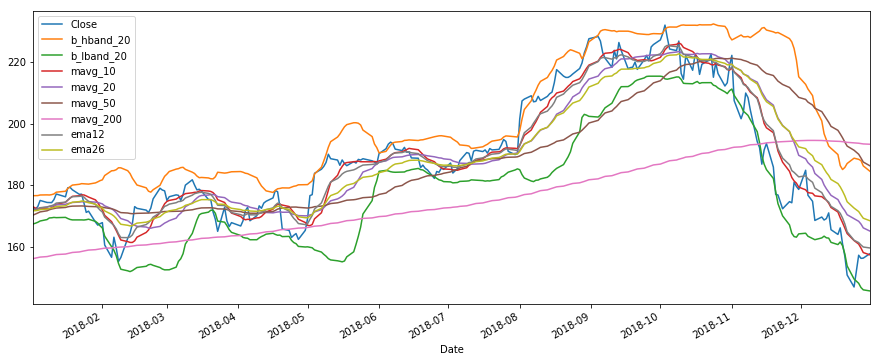

In [6]:
plot_columns(featured_series, 
             ['Close', 
              'b_hband_20', 
              'b_lband_20', 
              'mavg_10', 
              'mavg_20', 
              'mavg_50', 
              'mavg_200', 
              'ema12', 
              'ema26'], 
             fromTo=('2018-1-1', '2018-12-31'))

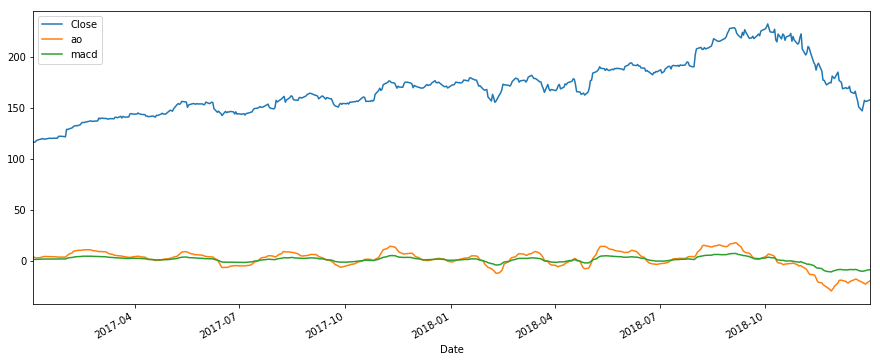

In [7]:
plot_columns(featured_series, ['Close', 'ao', 'macd'], fromTo=('2017-1-1', '2018-12-31'))

### Other features and assets

Let's add more features. How about adding the CPI?

In [8]:
# https://fred.stlouisfed.org/series/CPIAUCSL
cpi = load_csv_with_dates('datasets/CPIAUCSL_FRED_19470101-20190401.csv')

# https://fred.stlouisfed.org/series/CPIAUCNS
# cpi = load_csv_with_dates('datasets/CPIAUCNS_FRED-19130101-20190401.csv')

In [9]:
cpi.head()

,CPIAUCSL
DATE,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


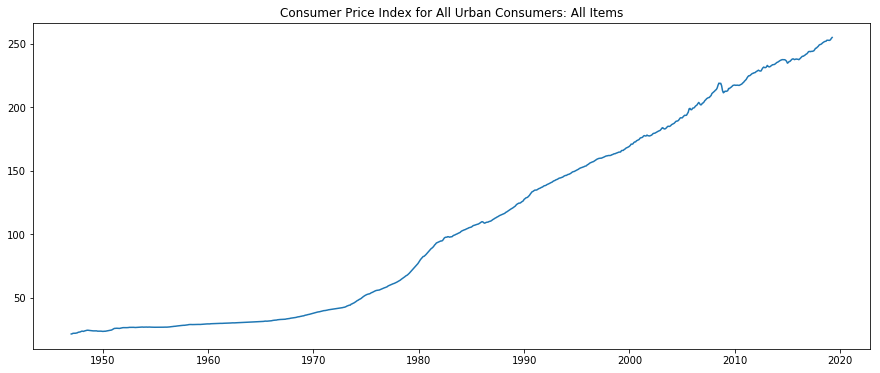

In [10]:
plot_series(cpi, title='Consumer Price Index for All Urban Consumers: All Items')

We need to first add all the missing days in cpi since the frequency of this index is monthly:

In [11]:
idx_date = pd.date_range(cpi.index[0], cpi.index[-1])
cpi_full = cpi.reindex(idx_date)
cpi_full.fillna(method='ffill', inplace=True)

In [12]:
cpi_full.head(n=35)

,CPIAUCSL
1947-01-01,21.48
1947-01-02,21.48
1947-01-03,21.48
1947-01-04,21.48
1947-01-05,21.48
1947-01-06,21.48
1947-01-07,21.48
1947-01-08,21.48
1947-01-09,21.48
1947-01-10,21.48


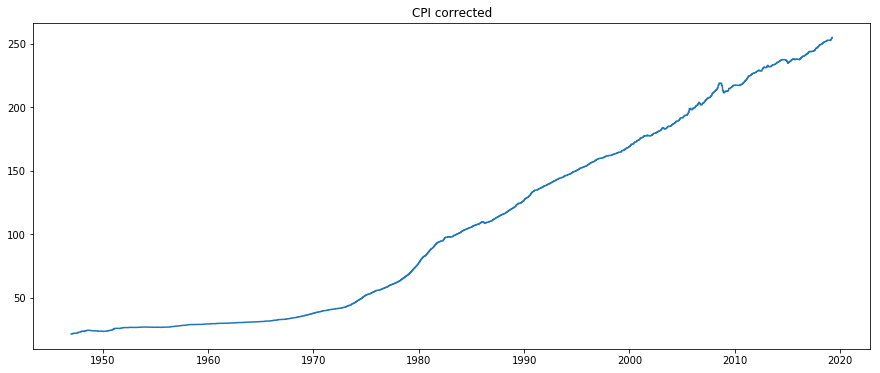

In [13]:
plot_series(cpi_full, title='CPI corrected')

In [14]:
featured_series = pd.merge(featured_series, cpi_full, left_index=True, right_index=True)

In [15]:
featured_series[['Close', 'CPIAUCSL']].describe()

,Close,CPIAUCSL
count,9244.000000,9244.000000
mean,28.337799,173.859729
std,48.829891,48.258950
min,0.196429,88.000000
25%,1.089286,134.800000
50%,1.747456,173.900000
75%,29.242143,217.403000
max,232.070007,254.958000


### CBOE Volatility Index

The [CBOE Volatility Index](https://www.investopedia.com/terms/v/vix.asp) is a popular measure of the stock market's expectation of 30-day forward-looking volatility derived from the price inputs of the S&P 500 index options, it provides a measure of market risk and investors' sentiments.

In [16]:
# https://en.wikipedia.org/wiki/VIX
vix = load_csv_with_dates('datasets/VIX_yahoo-finance_19900102-20190531.csv')

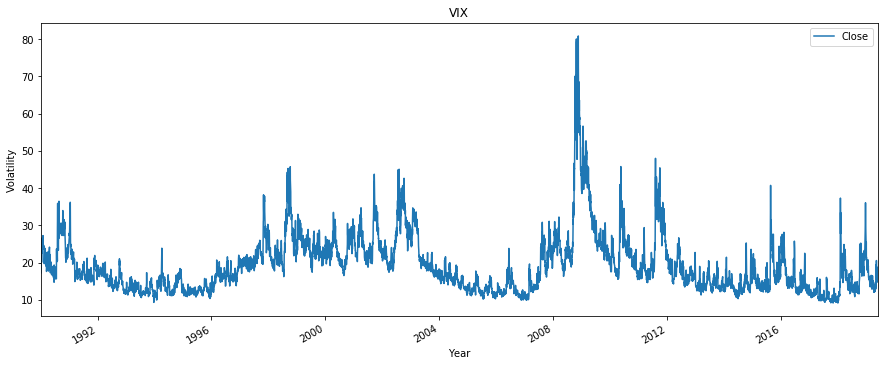

In [17]:
plot_field_over_time(vix, title='VIX', ylabel='Volatility')

In [18]:
featured_series = pd.merge(featured_series, 
                           vix['Close'], 
                           left_index=True, 
                           right_index=True, 
                           suffixes=('', '_vix'))

### Nasdaq 100 Index

The [Nasdaq 100 Index](https://www.investopedia.com/terms/n/nasdaq100.asp) is a basket of the 100 largest, most actively traded U.S companies listed on the Nasdaq stock exchange. The index includes companies from various industries except for the financial industry, like commercial and investment banks

In [19]:
# https://en.wikipedia.org/wiki/NASDAQ-100
ndx = load_csv_with_dates('datasets/NDX_yahoo-finance_19851001-20190531.csv')

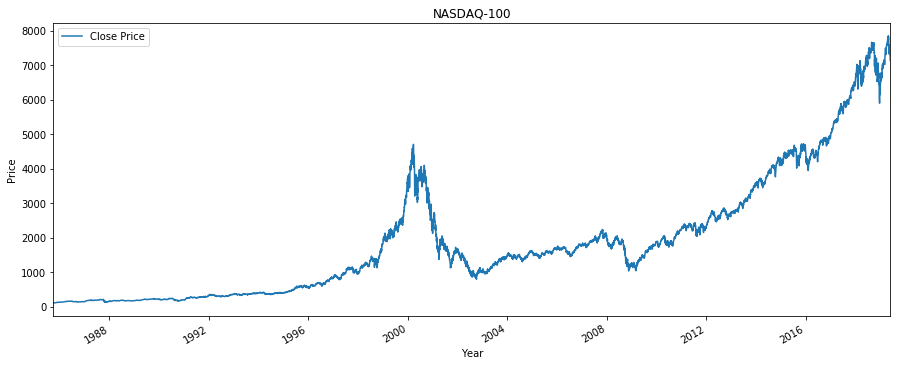

In [20]:
plot_field_over_time(ndx, title='NASDAQ-100', ylabel='Price', ylegend='Close Price')

In [21]:
featured_series = pd.merge(featured_series, 
                           ndx['Close'], 
                           left_index=True, 
                           right_index=True, 
                           suffixes=('', '_ndx'))

In [22]:
featured_series[['Close', 'Close_vix', 'Close_ndx']].describe()

,Close,Close_vix,Close_ndx
count,7191.000000,7191.000000,7191.000000
mean,36.196671,19.272143,2157.689831
std,52.791806,7.824012,1740.683011
min,0.462054,9.140000,165.195007
25%,1.428571,13.600000,956.450012
50%,4.636428,17.389999,1679.050049
75%,59.975715,22.660000,2792.484986
max,232.070007,80.860001,7660.180176


In [23]:
featured_series.head()

,Open,High,Low,Close,Volume,ao,mfi_14,rsi_14,so_14,so_sig_14,...,mi,trix_15,vi_neg_14,vi_pos_14,cr,dlr,dr,CPIAUCSL,Close_vix,Close_ndx
1990-01-02,1.258929,1.339286,1.250000,1.330357,45799600.0,-0.184007,39.476730,55.206172,67.857200,39.550357,...,25.707347,-0.826148,1.168538,0.837078,159.130335,5.518597,5.673712,127.5,17.240000,227.725006
1990-01-03,1.357143,1.357143,1.339286,1.339286,51998800.0,-0.161922,57.222294,57.078261,90.909183,63.107374,...,25.688108,-0.807284,1.054052,1.108107,160.869548,0.668931,0.671173,127.5,18.190001,226.100006
1990-01-04,1.366071,1.383929,1.330357,1.343750,55378400.0,-0.135163,60.234895,58.088697,81.999866,80.255416,...,25.639428,-0.777781,0.855261,1.065788,161.739058,0.332758,0.333312,127.5,19.219999,224.714996
1990-01-05,1.348214,1.366071,1.321429,1.348214,30828000.0,-0.107274,67.578297,59.197033,83.999731,85.636260,...,25.513407,-0.740123,0.859061,1.107381,162.608567,0.331654,0.332205,127.5,20.110001,223.139999
1990-01-08,1.339286,1.357143,1.321429,1.357143,25393200.0,-0.082773,80.716082,61.544120,84.999888,83.666495,...,25.412580,-0.695797,0.795619,1.233576,164.347780,0.660100,0.662284,127.5,20.260000,223.539993


### Feature Importance

In [25]:
print('Total number of features', len(featured_series.columns))

Total number of features 61


We have 61 features in our dataset. At this point it's important to consider whether they're all good indicatives of price movements. Let's find out how important these features are to predict prices. We're gonna make use of ensembles of decision tree methods like gradient boosting, XGBoost. IOmportance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

In [26]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
def train_xgbregressor(series, forecast=1):
    X = series[:-forecast]
    y = series['Close'][forecast:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=False)
    
    regressor = XGBRegressor()
    regressor.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    
    return regressor

In [28]:
def plot_feature_importance(regressor, title='Feature importance', figsize=(15, 12)):
    fig, ax = plt.subplots(figsize=figsize)
    plot_importance(regressor, ax=ax)
    ax.set_title(title)

In [29]:
# Next day price prediction
regressor_1 = train_xgbregressor(featured_series, forecast=1)

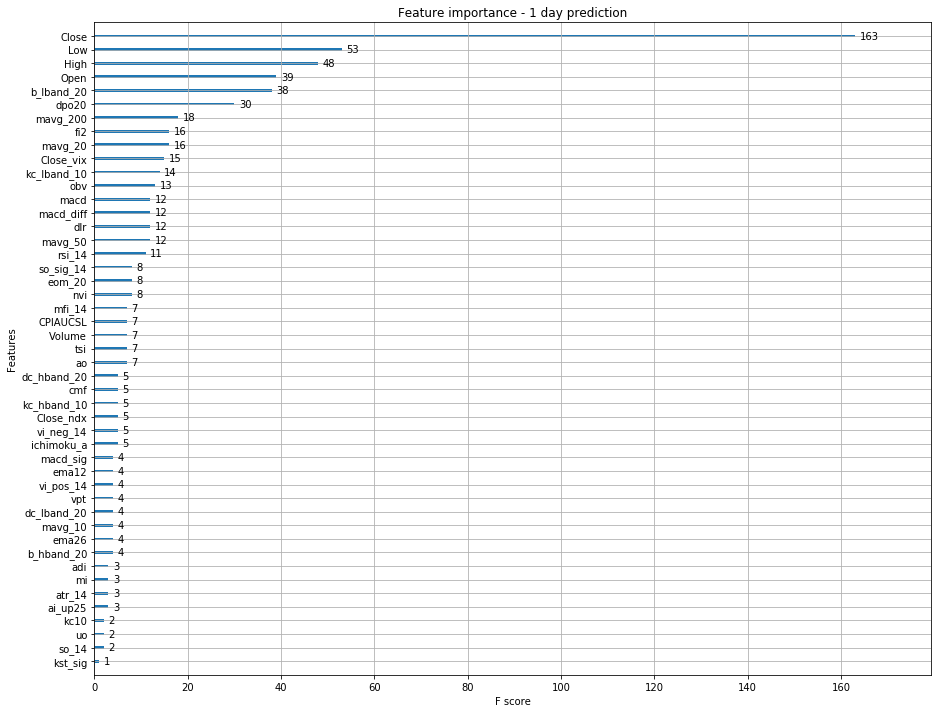

In [30]:
plot_feature_importance(regressor_1, title='Feature importance - 1 day prediction')

As expected, for the nex day prediction, Open, High, Low and Close are the ones with high score. Next day Close price will always be quite close to previous day Open, High, Low and Close price.

In [33]:
# Next 3 days
regressor_3 = train_xgbregressor(featured_series, forecast=3)

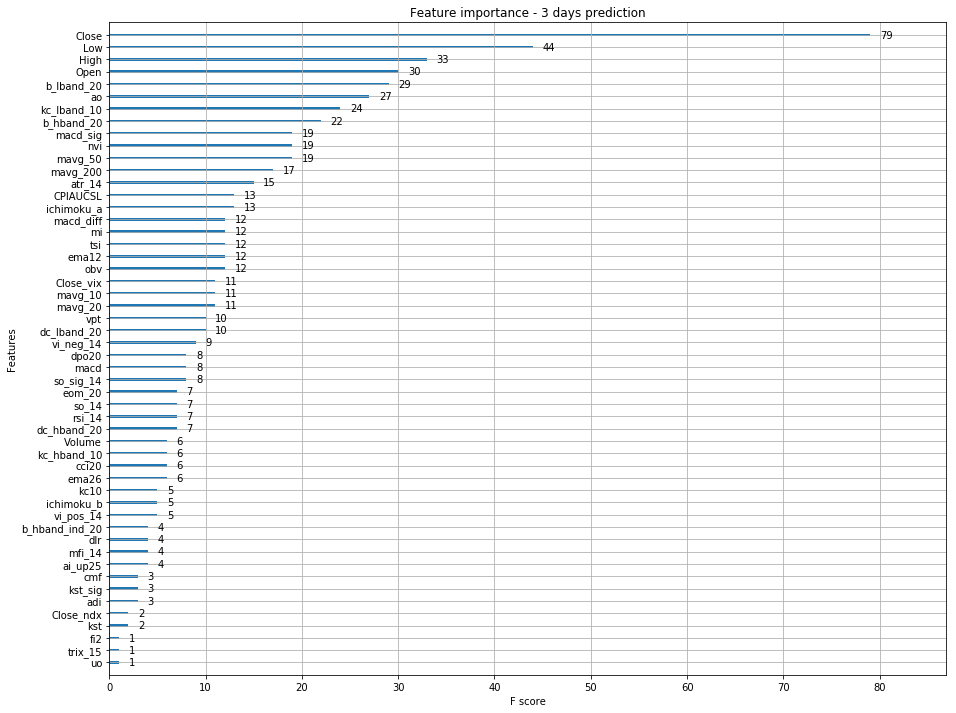

In [34]:
plot_feature_importance(regressor_3, title='Feature importance - 3 days prediction')

In [35]:
# Next 7 days
regressor_7 = train_xgbregressor(featured_series, forecast=7)

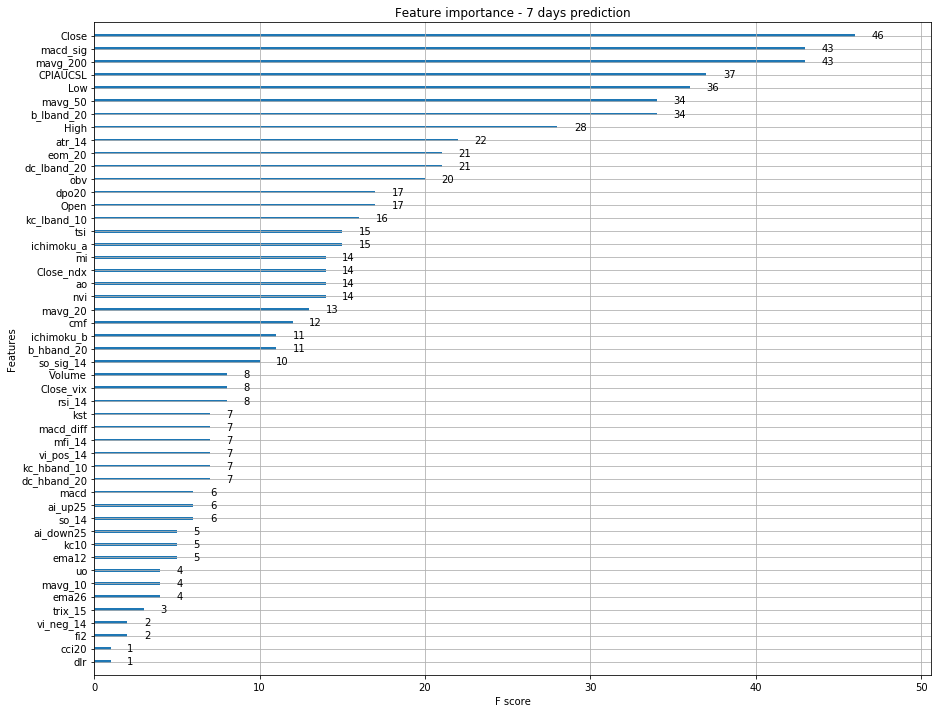

In [36]:
plot_feature_importance(regressor_7, title='Feature importance - 7 days prediction')

In [37]:
# Next 21 days (approx. one traiding month)
regressor_21 = train_xgbregressor(featured_series, forecast=21)

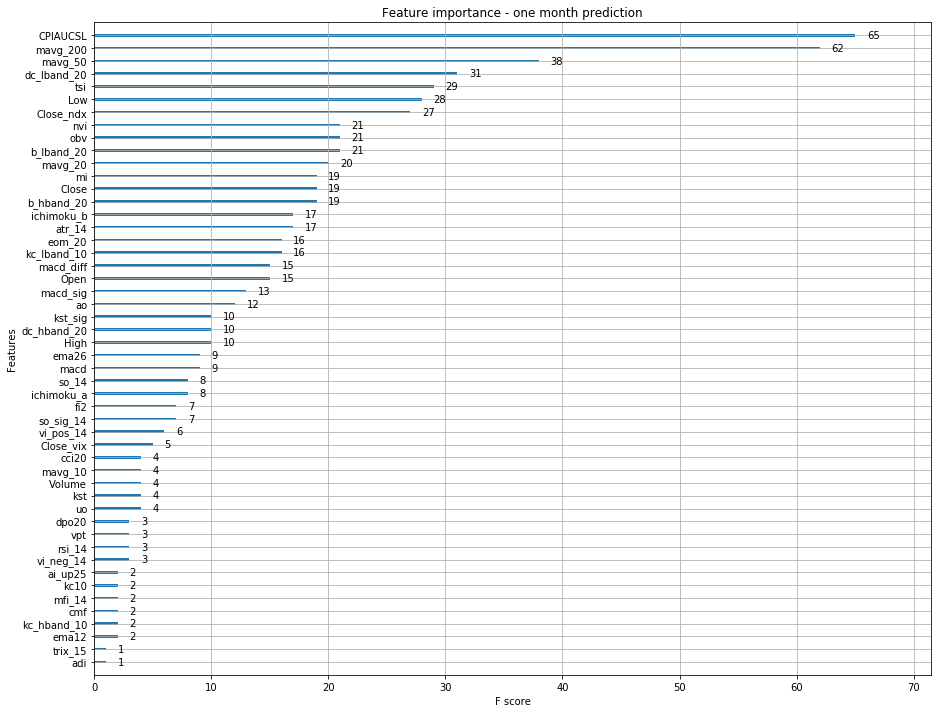

In [38]:
plot_feature_importance(regressor_21, title='Feature importance - one month prediction')

In [39]:
# Next 42 days (approx. two traiding month)
regressor_42 = train_xgbregressor(featured_series, forecast=42)

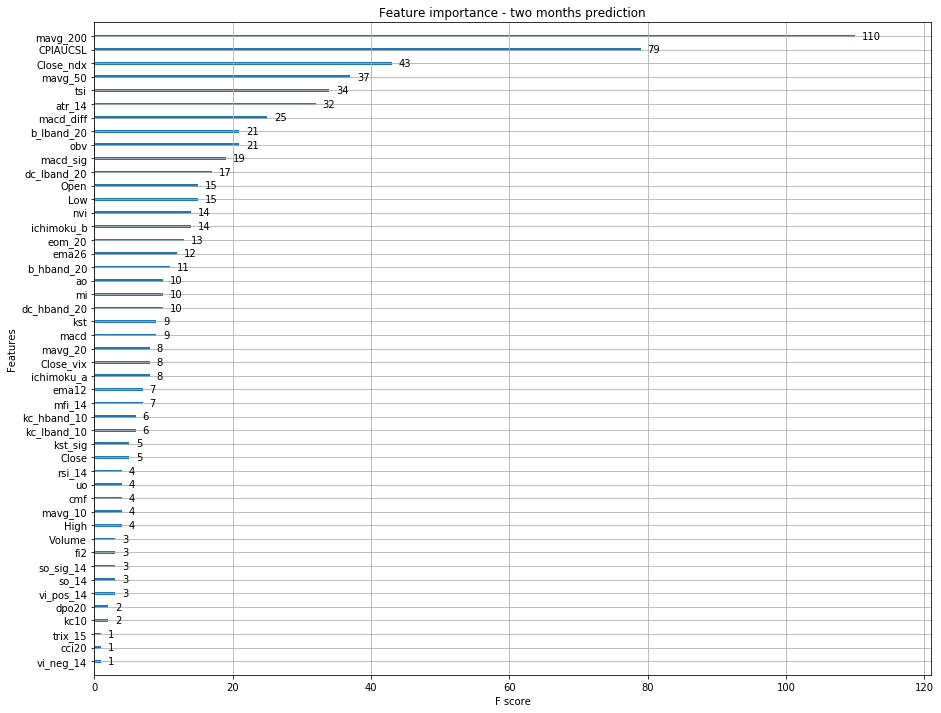

In [40]:
plot_feature_importance(regressor_42, title='Feature importance - two months prediction')

In [41]:
# Next 252 days (approx. one year)
regressor_252 = train_xgbregressor(featured_series, forecast=252)

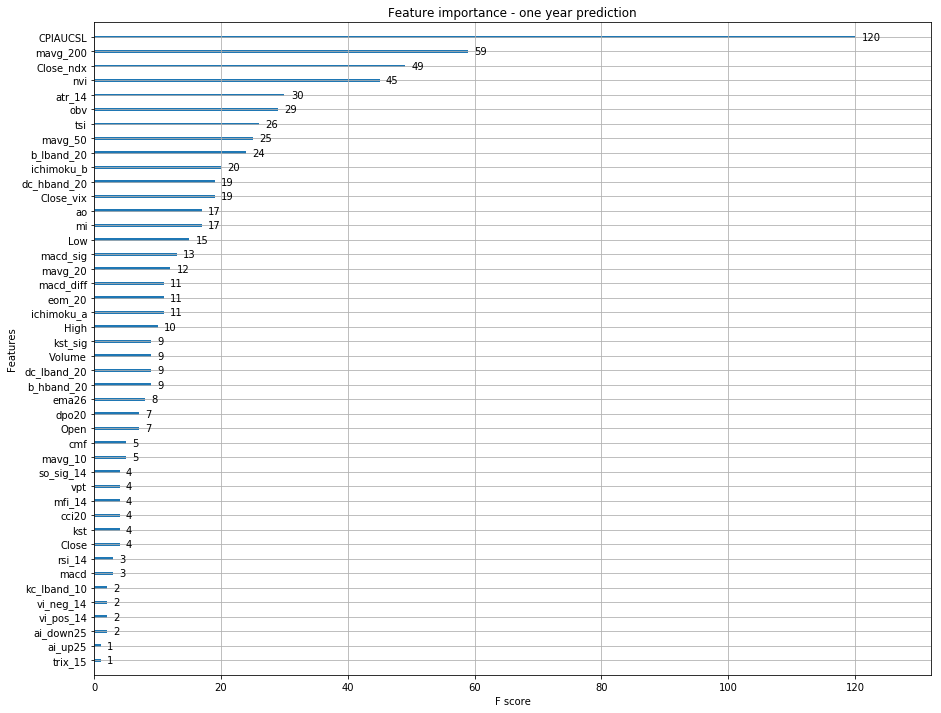

In [42]:
plot_feature_importance(regressor_252, title='Feature importance - one year prediction')

### Features Correlation

Let's find out about their correlation. There is no reason to keep all the features that are highly correlated

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_range

In [53]:
def plot_heatmap_corr(series, title='', cmap='coolwarm', figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(series.corr(), cmap=cmap, annot=True, ax=ax, vmin=0, vmax=1)
    ax.set_title(title)

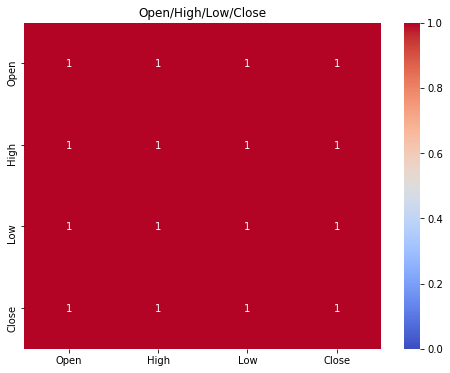

In [55]:
cols = ['Open', 'High', 'Low', 'Close']
plot_heatmap_corr(featured_series[cols], title='Open/High/Low/Close', figsize=(8, 6))

There is, for obvious reasons, high correlation between Open, High, Low and Close prices. Let's plot them to have a clearer picture

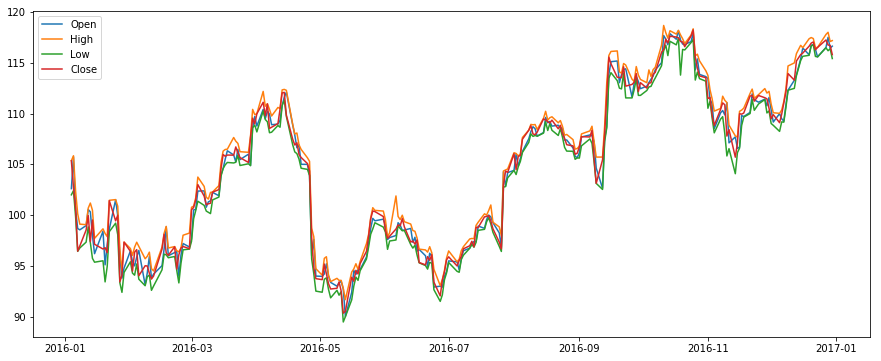

In [70]:
plot_series(get_range('2016-01-01', 
                      '2016-12-31', 
                      featured_series[['Open', 'High', 'Low', 'Close']]), 
            legend=['Open', 'High', 'Low', 'Close'])

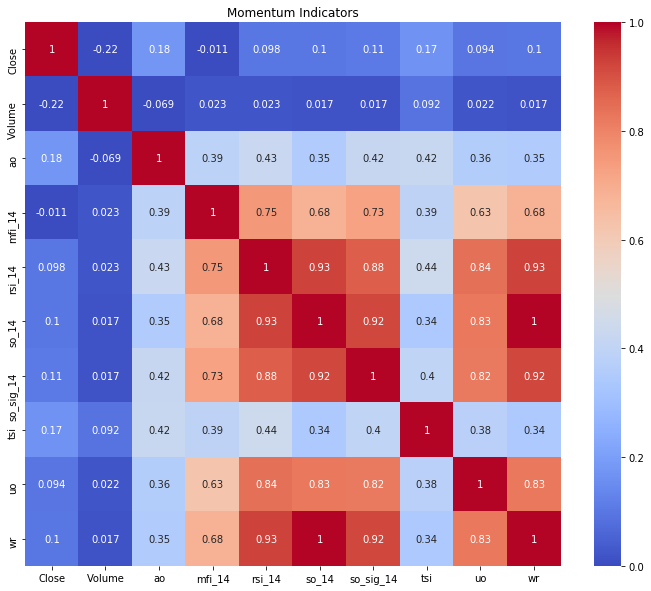

In [58]:
cols = ['Close', 'Volume', 'ao', 'mfi_14', 'rsi_14', 'so_14', 'so_sig_14', 'tsi', 'uo', 'wr']
plot_heatmap_corr(featured_series[cols], title='Momentum Indicators')

There seems to be high correlation between _Stochastic Oscillator(n=14)_ and _Williams %R_ indicator.

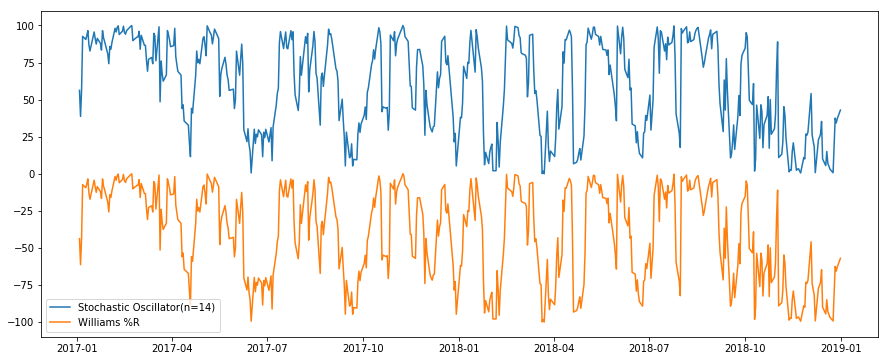

In [81]:
plot_series(get_range('2017-01-01', 
                      '2018-12-31', 
                      featured_series[['so_14', 'wr']]), 
            legend=['Stochastic Oscillator(n=14)', 'Williams %R'])

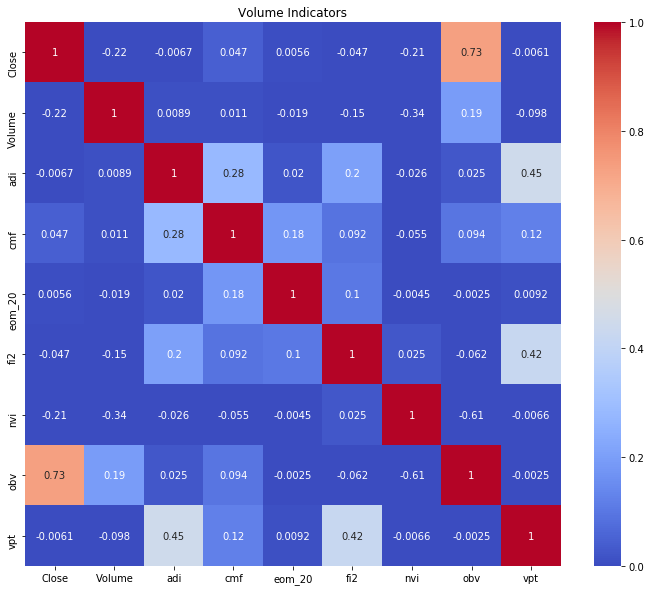

In [61]:
cols = ['Close', 'Volume', 'adi', 'cmf', 'eom_20', 'fi2', 'nvi', 'obv', 'vpt']
plot_heatmap_corr(featured_series[cols], title='Volume Indicators')

No correlation among these indicators

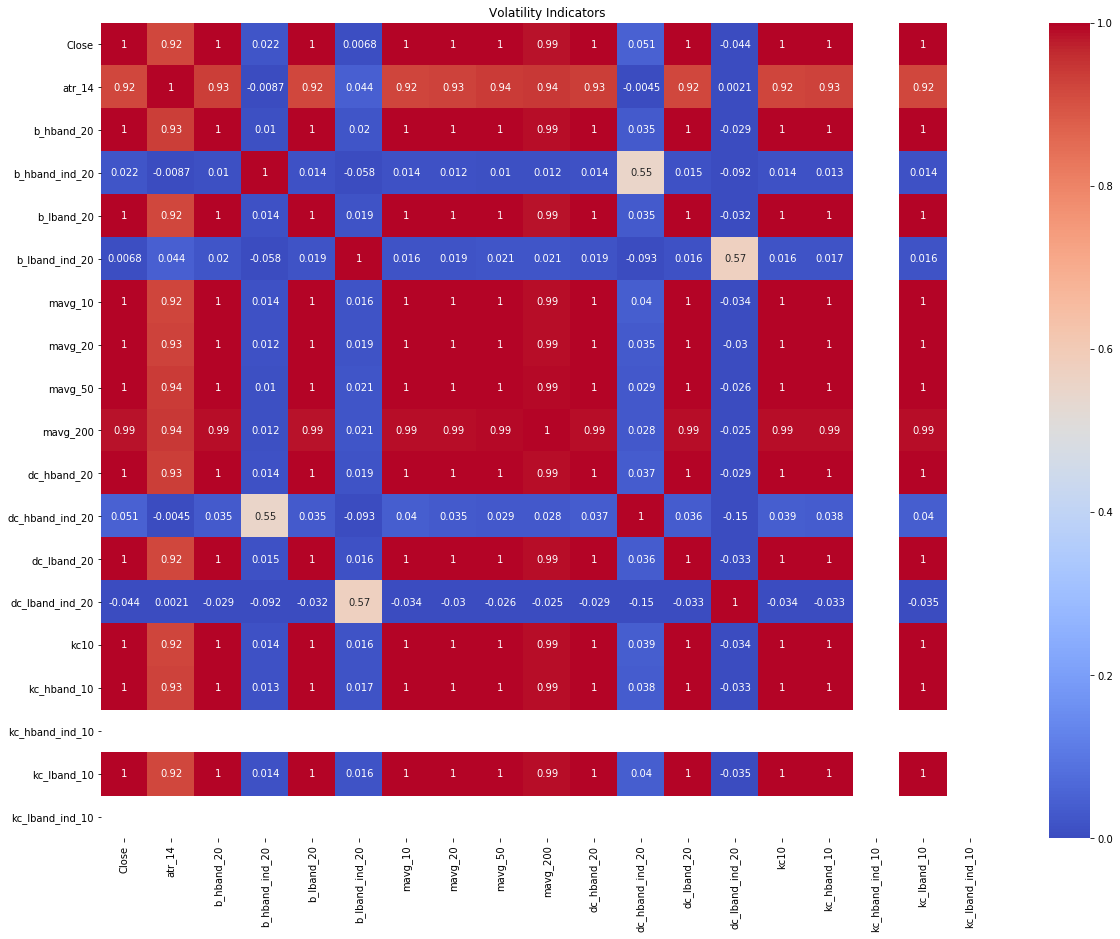

In [62]:
cols = ['Close', 
        'atr_14', 
        'b_hband_20', 
        'b_hband_ind_20', 
        'b_lband_20', 
        'b_lband_ind_20', 
        'mavg_10', 
        'mavg_20', 
        'mavg_50', 
        'mavg_200', 
        'dc_hband_20', 
        'dc_hband_ind_20', 
        'dc_lband_20', 
        'dc_lband_ind_20', 
        'kc10', 
        'kc_hband_10', 
        'kc_hband_ind_10', 
        'kc_lband_10', 
        'kc_lband_ind_10']
plot_heatmap_corr(featured_series[cols], title='Volatility Indicators', figsize=(20, 15))

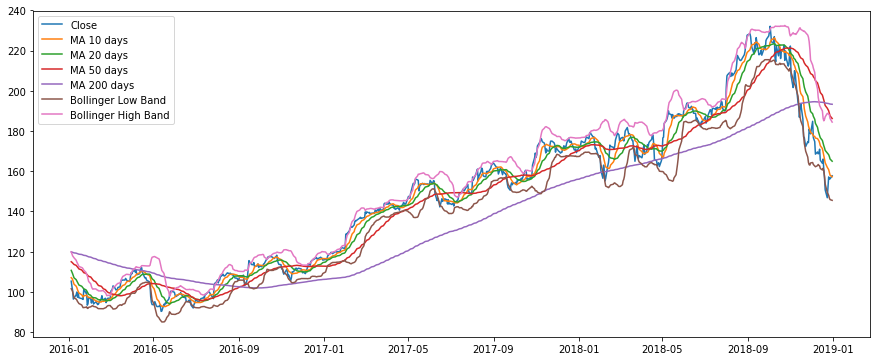

In [79]:
plot_series(get_range('2016-01-01', 
                      '2018-12-31', 
                      featured_series[['Close', 'mavg_10', 'mavg_20', 'mavg_50', 'mavg_200', 'b_lband_20', 'b_hband_20']]), 
            legend=['Close', 
                    'MA 10 days', 
                    'MA 20 days', 
                    'MA 50 days', 
                    'MA 200 days', 
                    'Bollinger Low Band', 
                    'Bollinger High Band'])

We have many highly correlated features. We can get rid off most of the the _Moving Average_, _Bollinger Bands_, _Donchian Channels_ and _Keltner Channels_

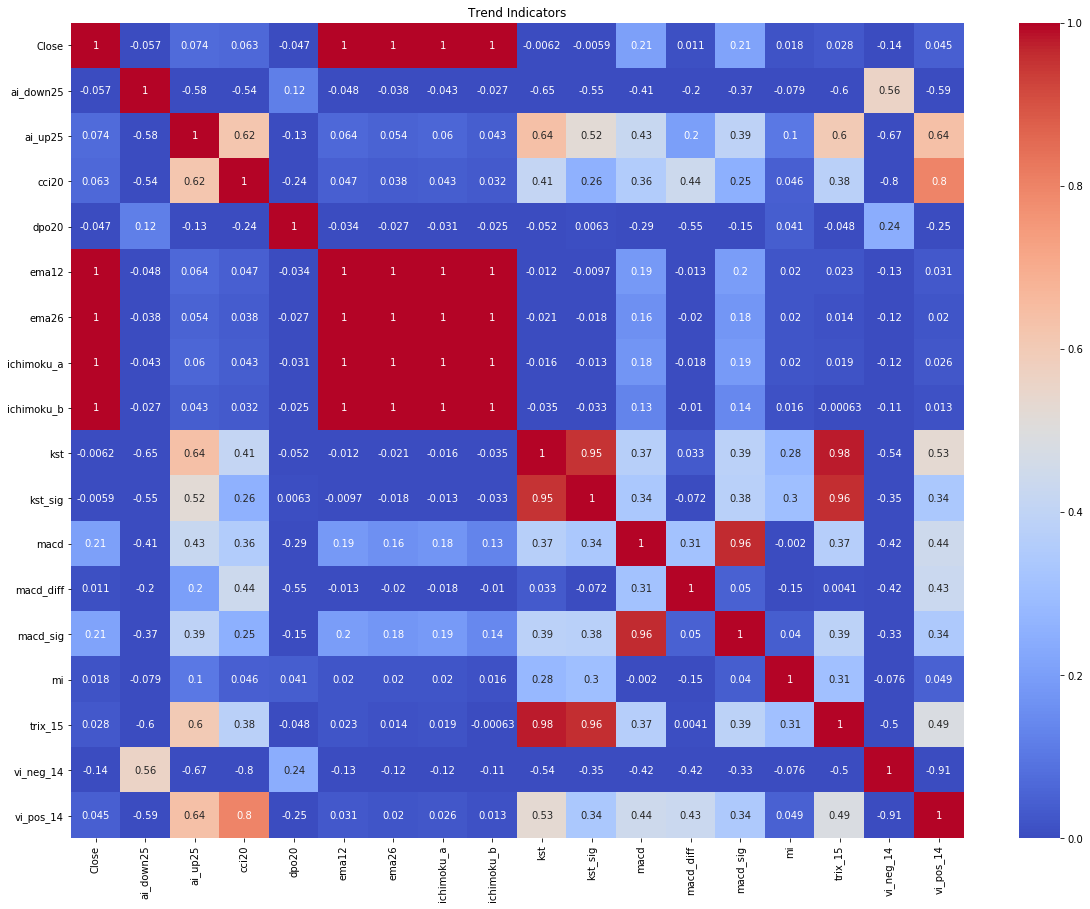

In [63]:
cols = ['Close', 
        'ai_down25', 
        'ai_up25', 
        'cci20', 
        'dpo20', 
        'ema12', 
        'ema26', 
        'ichimoku_a', 
        'ichimoku_b', 
        'kst', 
        'kst_sig', 
        'macd', 
        'macd_diff', 
        'macd_sig', 
        'mi', 
        'trix_15', 
        'vi_neg_14', 
        'vi_pos_14']
plot_heatmap_corr(featured_series[cols], title='Trend Indicators', figsize=(20, 15))

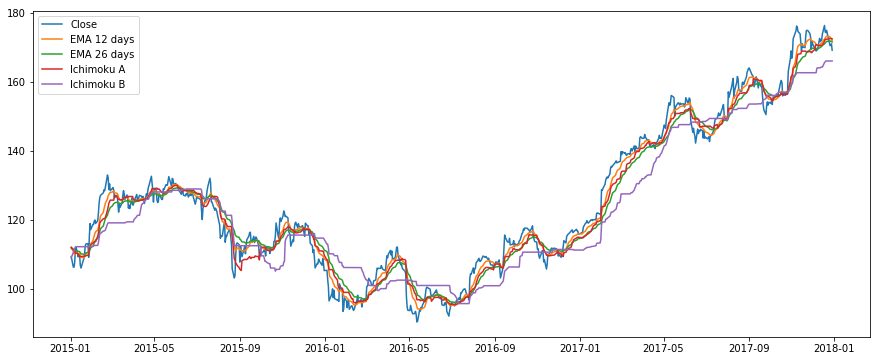

In [80]:
plot_series(get_range('2015-01-01', 
                      '2017-12-31', 
                      featured_series[['Close', 'ema12', 'ema26', 'ichimoku_a', 'ichimoku_b']]), 
            legend=['Close', 'EMA 12 days', 'EMA 26 days', 'Ichimoku A', 'Ichimoku B'])

High correlation among the EMA, Ichimoku indicators and Close price

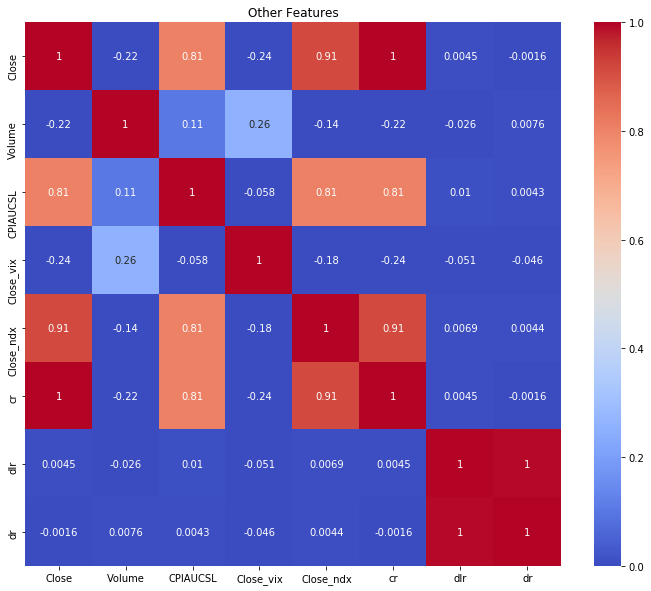

In [64]:
cols = ['Close',  
        'Volume',
        'CPIAUCSL', 
        'Close_vix',
        'Close_ndx', 
        'cr', 
        'dlr', 
        'dr']
plot_heatmap_corr(featured_series[cols], title='Other Features')

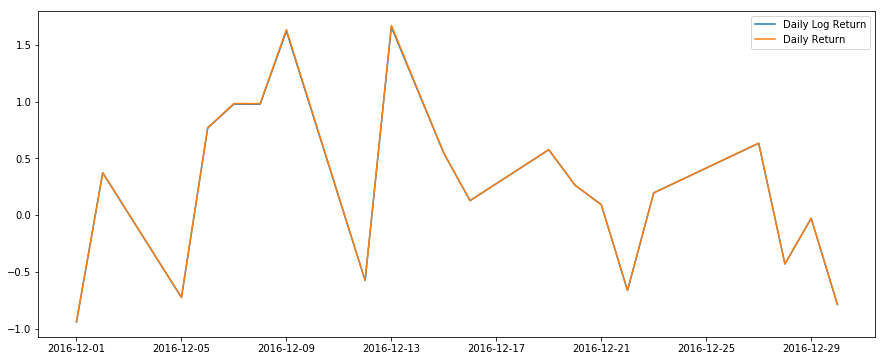

In [89]:
plot_series(get_range('2016-12-01', 
                      '2016-12-31', 
                      featured_series[['dlr', 'dr']]), 
            legend=['Daily Log Return', 'Daily Return'])